In [4]:
exp = 'rates'
groups = [
    # ('2nn', 'mnist'),
    ('cnn', 'fmnist'),
    ('lenet5', 'cifar10'),
    # ('resnet9', 'cifar100'),
]
metric = 'acc'
eps = [0.05, 0.1, 0.25, 0.5, 1]

In [5]:
import mplfonts
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
# mplfonts.use_font('Noto Serif CJK SC')
cmap = matplotlib.colormaps['viridis']
norm = plt.Normalize(0,1)
def path(exp, epsilon, dataset, model, metric, index):
    return f'../results/{exp}-{epsilon}-{dataset}-{model}-{metric}{index}.csv'

         0.05                  0.10                  0.25               \
          acc         time      acc         time      acc         time   
0.0   0.80818   677.421803  0.86796   751.704608  0.88632   772.086361   
0.1   0.82768  1034.299903  0.87008  1137.159502  0.88478  1137.151355   
0.25  0.85066  1580.486401  0.87582  1736.142180  0.88756  1737.232967   
0.5   0.86894  2501.424374  0.88206  2774.973977  0.89022  2782.841118   
0.8   0.88160  3508.757032  0.88736  4018.611838  0.89012  4063.487641   
1.0   0.89068  4215.685751  0.88980  4932.591743  0.89232  4813.027645   

         0.50                  1.00               
          acc         time      acc         time  
0.0   0.88664   671.244192  0.88880   680.856749  
0.1   0.88898  1021.810594  0.88892  1025.370047  
0.25  0.88908  1602.777564  0.88942  1554.790740  
0.5   0.89010  2497.515993  0.88940  2462.482434  
0.8   0.89102  3673.537942  0.88856  3563.051623  
1.0   0.89000  4388.333965  0.88966  4407.499639  

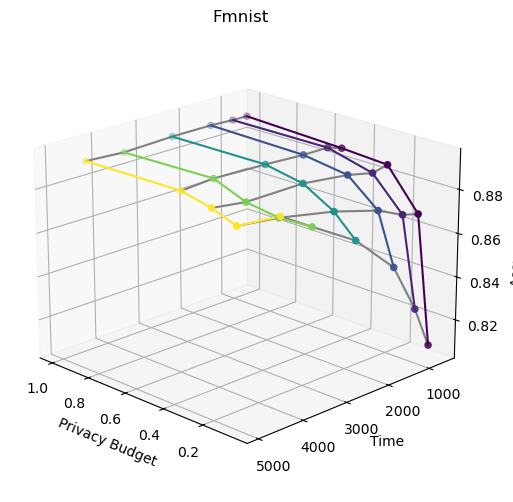

         0.05                  0.10                  0.25               \
          acc         time      acc         time      acc         time   
0.0   0.31180   697.960470  0.48092   818.001708  0.57706   715.424582   
0.1   0.37066  1186.389719  0.51238  1391.781154  0.58420  1233.286523   
0.25  0.42792  1955.851062  0.52754  2237.547591  0.58996  2022.499998   
0.5   0.48684  3284.217216  0.55826  3698.967438  0.59344  3382.790939   
0.8   0.55664  4858.361949  0.59046  5454.112595  0.60230  4975.438726   
1.0   0.60320  5926.078850  0.60758  6621.389128  0.60324  6004.465351   

         0.50                  1.00               
          acc         time      acc         time  
0.0   0.59066   703.430601  0.60480   777.805211  
0.1   0.59670  1191.566178  0.60490  1283.170549  
0.25  0.59500  1932.725789  0.60682  2017.905520  
0.5   0.59746  3242.801715  0.61220  3252.904547  
0.8   0.60038  4819.706515  0.60542  4674.425053  
1.0   0.59894  5826.796019  0.59966  5674.211747  

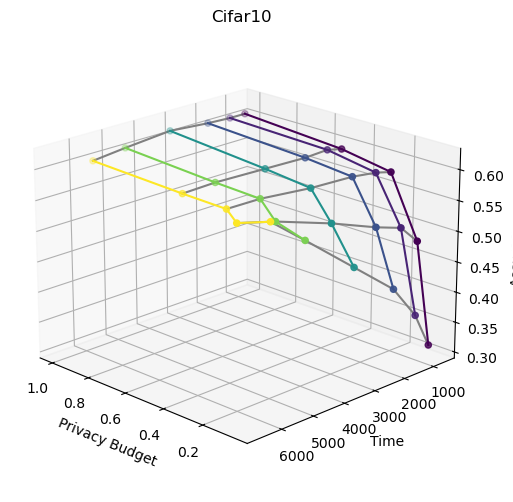

In [7]:

for model, dataset in groups:
    df_eps = []
    for ep in eps:
        df_temp = []
        for metric in ['acc', 'time']:
            dfs = [pd.read_csv(path(exp, ep, dataset, model, metric, i), index_col=0) for i in range(5)]
            df = pd.concat(dfs, axis=0)
            df = df.rename(columns={
                'global': "Prev",
                'random': "Random",
                'best': "Min",
                'worst': "Max",
            })
            df_mean = df.groupby(level=0).mean()
            df_mean_max = df_mean.max()
            df_temp.append(df_mean_max)
        df_temp = pd.concat(df_temp, axis=1, keys=['acc', 'time'])
        df_eps.append(df_temp)
    df = pd.concat(df_eps, axis=1, keys=eps)
    print(df)
    
    import matplotlib.pyplot as plt
    import numpy as np

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')



    # 假设你的 DataFrame 是 df
    x_data = []
    y_data = []
    z_data = []
    for i, index in enumerate(df.index):
        x = df.columns.levels[0].values  # epsilon
        z = df.loc[index, (slice(None), 'acc')].values  # acc 行的值
        y = df.loc[index, (slice(None), 'time')].values  # time 行的值\
        x_data.extend(x)
        y_data.extend(y)
        z_data.extend(z)
    
    for ep in set(x_data):
        indices = [i for i, x in enumerate(x_data) if x == ep]
        x = [x_data[i] for i in indices]
        y = [y_data[i] for i in indices]
        z = [z_data[i] for i in indices]
        ax.plot(x, y, z, color='gray')
        
    for i, index in enumerate(df.index):
        x = df.columns.levels[0].values  # epsilon
        z = df.loc[index, (slice(None), 'acc')].values  # acc 行的值
        y = df.loc[index, (slice(None), 'time')].values  # time 行的值\
        ax.plot(x, y, z, c=cmap(norm(float(index))))
        ax.scatter(x, y, z, color=cmap(norm(float(index))))

    # plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='vertical')
    ax.set_xlabel('Privacy Budget')
    ax.set_ylabel('Time')
    ax.set_zlabel('Accuracy')
    ax.view_init(elev=20, azim=135)
    plt.title(f'{dataset}'.capitalize())
    plt.savefig(f'{exp}-{dataset}.svg')
    plt.show()
    
    
    
    
    
    